In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset= pd.read_csv('/content/Mall_Customers (1).csv')

In [ ]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
dataset= dataset.drop(columns=['','',''])

In [ ]:
dataset.shape

(200, 2)

1. determine k value.
2. apply K-means.

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
  kmean=KMeans(n_clusters=i, init='k-means++',random_state=0)
  kmean.fit(dataset)
  wcss.append(kmean.inertia_)

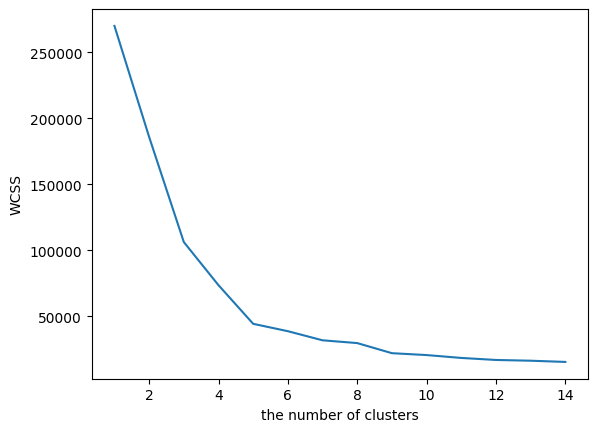

In [ ]:
plt.plot(range(1,15),wcss)
plt.xlabel('the number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k=5
kmeans=KMeans(n_clusters=k, init='k-means++',random_state=0)
kmeans.fit(dataset)


KMeans(n_clusters=5, random_state=0)

In [ ]:
cluster_num= kmeans.fit_predict(dataset)

In [ ]:
cluster_num

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
plt.plot(range(1,15),wcss)
plt.xlabel('the number of clusters')
plt.ylabel('WCSS')
plt.show()

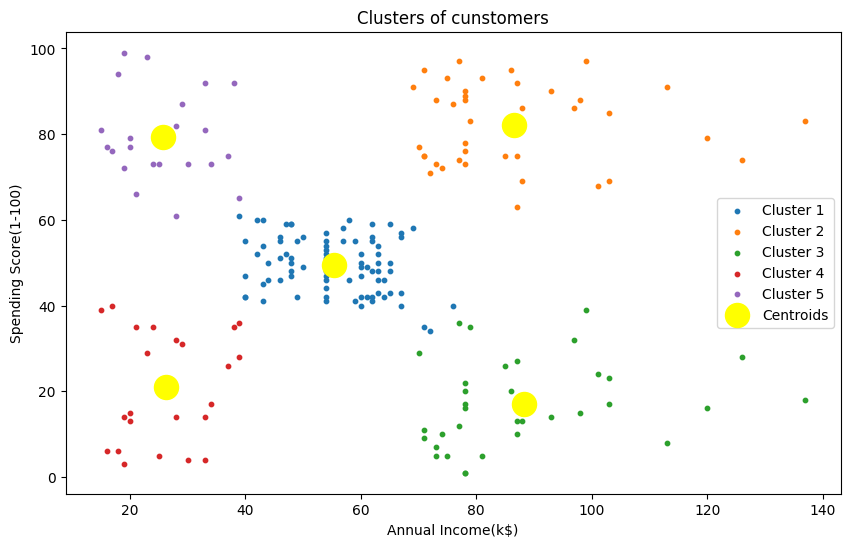

In [ ]:
plt.figure(figsize=(10,6))
k=5
for i in range(k):
  plt.scatter(dataset.iloc[cluster_num== i,0],dataset.iloc[cluster_num== i,1],
              s=10, label= f'Cluster {i+1}'
              )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
              s=300, c='yellow', label='Centroids')

plt.title('Clusters of cunstomers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()